# ***Reparameterization of the categorical distribution***





We will work with Torch throughout this notebook.

In [4]:
import torch
from torch.distributions import Beta #, ...  import the distributions you need here
from torch.nn import functional as F

A helper function to visualize the generated samples:

In [6]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=100, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range)
    plt.hist(samples_2, bins=bins, range=range)
  else:
    plt.hist(samples_1, bins=bins)
    plt.hist(samples_2, bins=bins)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

### ***Categorical Distribution***
Below write a function that generates N samples from Categorical (**a**), where **a** = $[a_0, a_1, a_2, a_3]$.

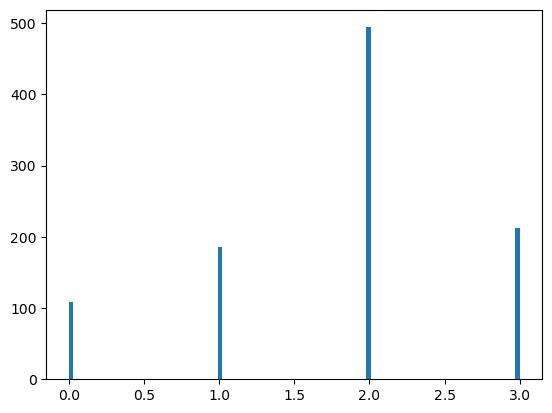

In [ ]:
def categorical_sampler(a, N):
  samples = torch.distributions.Categorical(torch.tensor(a)).sample((N,))

  return samples  # should be N-by-1

## TEST
plt.figure()
samples = categorical_sampler([0.1,0.2,0.5,0.2], 1000)
plt.hist(samples, bins=100)
plt.show()

Now write a function that generates samples from Categorical (**a**) via reparameterization:




In [ ]:
# Hint: approximate the Categorical distribution with the Gumbel-Softmax distribution
def categorical_reparametrize(a, N, temp=0.1, eps=1e-20):  # temp and eps are hyperparameters for Gumbel-Softmax
  g_gumbel_0_1 = torch.distributions.Gumbel(0,1).sample((N,len(a)))

  x = torch.log(torch.tensor(a) + eps) + g_gumbel_0_1
  
  samples = torch.nn.functional.softmax(x / temp, dim=-1)

  return samples # make sure that your implementation allows the gradient to backpropagate


## TEST
plt.figure()
samples = categorical_reparametrize([0.1,0.2,0.5,0.2], 5)
plt.hist(samples, bins=100)
plt.show()

TypeError: can only concatenate list (not "float") to list

<Figure size 640x480 with 0 Axes>

Generate samples when $a = [0.1,0.2,0.5,0.2]$ and visualize them:

In [ ]:
a = torch.tensor([0.1,0.2,0.5,0.2])
N = 1000
direct_samples = categorical_sampler(a, N)
reparametrized_samples = categorical_reparametrize(a, N, temp=0.1, eps=1e-20)
compare_samples(direct_samples, reparametrized_samples)